# Lab 4


## KNN


Accuracy for k=1: 0.7777777777777778
Accuracy for k=3: 0.8055555555555556
Accuracy for k=5: 0.7222222222222222
Accuracy for k=7: 0.6944444444444444


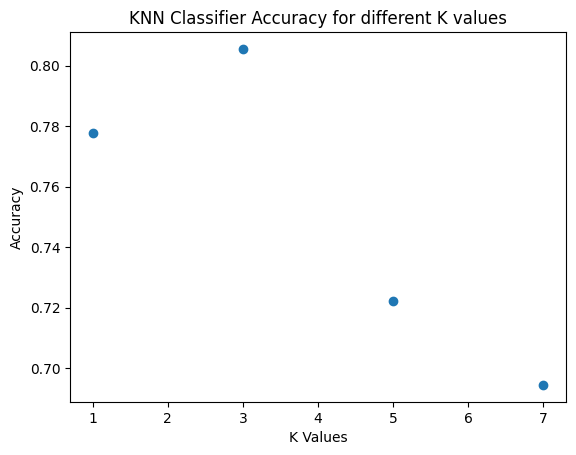

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

wine_df = load_wine()
X, y = wine_df.data, wine_df.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_values = [1, 3, 5, 7]
accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracy.append(acc)
    print(f"Accuracy for k={k}: {acc}")

# plotting accuracy against the different k values
plt.scatter(k_values, accuracy)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("KNN Classifier Accuracy for different K values")
plt.show()

In [26]:
k_values = range(1, 30)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicts = knn.predict(X_test)
    acc = accuracy_score(predicts, y_test)
    accuracy_scores.append(acc)

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Best Value of k:", best_k)

Best Value of k: 3


In [27]:
p_values = [1, 2, 3, 4, 5]
accuracy = []

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=5, p=p)
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = accuracy_score(predicted, y_test)
    accuracy.append(acc)
    print(f"Accuracy Score for p = {p}: {acc}")

Accuracy Score for p = 1: 0.8055555555555556
Accuracy Score for p = 2: 0.7222222222222222
Accuracy Score for p = 3: 0.7222222222222222
Accuracy Score for p = 4: 0.7222222222222222
Accuracy Score for p = 5: 0.7222222222222222


## SVM


In [28]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("Datasets/income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
categorical_cols = (
    df.select_dtypes(include=["object"]).columns
)  # select_dtypes is a pandas function that selects columns based on their data type
numerical_cols = df.select_dtypes(exclude=["object"]).columns

# applying one hot encoding to categorical features
df = pd.get_dummies(
    df, columns=categorical_cols, drop_first=True
)  # drop_first is used to avoid dummy variable trap

df.columns

Index(['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' workclass_ Federal-gov', ' workclass_ Local-gov',
       ' workclass_ Private', ' workclass_ Self-emp-inc',
       ' workclass_ Self-emp-not-inc', ' workclass_ State-gov',
       ' workclass_ Without-pay', ' education_ 11th', ' education_ 12th',
       ' education_ 1st-4th', ' education_ 5th-6th', ' education_ 7th-8th',
       ' education_ 9th', ' education_ Assoc-acdm', ' education_ Assoc-voc',
       ' education_ Bachelors', ' education_ Doctorate', ' education_ HS-grad',
       ' education_ Masters', ' education_ Preschool',
       ' education_ Prof-school', ' education_ Some-college',
       ' marital-status_ Married-AF-spouse',
       ' marital-status_ Married-civ-spouse',
       ' marital-status_ Married-spouse-absent',
       ' marital-status_ Never-married', ' marital-status_ Separated',
       ' marital-status_ Widowed', ' occupation_ Adm-clerical',
       ' occupation_ Arm

In [30]:
y = df["income_ >50K"].values
X = df.drop("income_ >50K", axis=1)
# using .values converts the dataframe to a numpy array and we cant then do scaling by writing X_train[numerical_cols] cuz when we write it like that we're dealing with it like we would a df. so we'll convert it to numpy array after scaling

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

display(X_train.head())

X_train = X_train.values
X_test = X_test.values

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
4400,-0.996110,-0.550200,-1.222152,-0.147881,-0.221529,-2.351924,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2598,0.181302,-0.077999,-0.427479,-0.147881,-0.221529,0.791095,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
496,-1.364051,0.666475,-0.030143,-0.147881,-0.221529,-0.036015,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4915,-1.511228,-0.028649,-1.222152,-0.147881,-0.221529,-1.690236,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1341,1.358714,-0.955980,1.559203,-0.147881,-0.221529,-0.036015,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
svc_model = SVC(
    kernel="linear", random_state=101
)  # kernel is the type of hyperplane to be used, linear is used for linearly separable data, other options are poly, rbf, sigmoid
svc_model.fit(X_train, y_train)

accuracies = cross_val_score(
    svc_model, X_train, y_train, cv=5
)  # thisfunction will split the training data into 5 parts and train the model on 4 parts and test on the 5th part, this will be done 5 times and the average accuracy will be returned

print("Training Accuracy Score: ", np.mean(accuracies))
print(
    "Test Accuracy Score: ", svc_model.score(X_test, y_test)
)  # svc_mode.score gives the accuracy of the model on the test data

Training Accuracy Score:  0.8463733650416172
Test Accuracy Score:  0.8384030418250951


## Voting Classifier


In [32]:
# voting classifier: you train your data on multiple models and then take a vote on which model is giving the best accuracy, you do this when you are not sure which model is best suited for your data

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
random_model = RandomForestClassifier()
svm_model = SVC()
voting_clf = VotingClassifier(
    estimators=[("log", log_model), ("rf", random_model), ("svc", svm_model)],
    voting="hard",
)  # voting can be hard or soft, hard means the class with the most votes is selected, soft means the class with the highest probability is selected, estimators is a list of tuples where each tuple contains the name of the model and the model itself


for classifier in [log_model, random_model, svm_model, voting_clf]:
    classifier.fit(X_train, y_train)
    y_predicts = classifier.predict(X_test)
    print(
        f"Accuracy of {classifier.__class__.__name__}: {accuracy_score(y_test, y_predicts)}"
    )  # .__class means the class of the object, .__name__ gives the name of the class


Accuracy of LogisticRegression: 0.8450570342205324
Accuracy of RandomForestClassifier: 0.8507604562737643
Accuracy of SVC: 0.8488593155893536
Accuracy of VotingClassifier: 0.8488593155893536


## Activity 1: KNN for Credit Card Fraud Detection


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
print("\nDataset Shape:")
print(df.shape)
df.dtypes
# no need for encoding as all features are numerical



Dataset Shape:
(284807, 31)


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [35]:
# checking class distributing to see if there is any imbalance
print("\nClass Distribution:")
print(df["Class"].value_counts())
print(f"\nFraud Percentage: {(df['Class'].sum() / len(df)) * 100:.2f}%")


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Percentage: 0.17%


In [36]:
X = df.drop("Class", axis=1)
y = df["Class"]

print("Features Shape: ", X.shape)
print("Target Shape: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")
print(f"Training fraud cases: {y_train.sum()}")
print(f"Test fraud cases: {y_test.sum()}")

Features Shape:  (284807, 30)
Target Shape:  (284807,)

Training Set Size: 227845
Testing Set Size: 56962
Training fraud cases: 394
Test fraud cases: 98


### With SMOTE


In [37]:
smot_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # scaling the features
        ("smote", SMOTE(random_state=42)),  # balancing the classes
        ("clf", KNeighborsClassifier(n_neighbors=5)),  # applying knn
    ]
)

smote_pipeline = smot_pipeline.fit(X_train, y_train)
y_predicts_smote = smot_pipeline.predict(X_test)

accuracy_smote = accuracy_score(y_test, y_predicts_smote)
f1_smote = f1_score(y_test, y_predicts_smote)

print("=== SMOTE Results ====")
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"F1 Score: {f1_smote:.4f}")

=== SMOTE Results ====
Accuracy: 0.9978
F1 Score: 0.5831


### With ADASYN


In [38]:
adasyn_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("adasyn", ADASYN(random_state=42)),
        ("classifier", KNeighborsClassifier(n_neighbors=5)),
    ]
)

adasyn_pipeline.fit(X_train, y_train)
y_predicts_adasyn = adasyn_pipeline.predict(X_test)

accuracy_adasyn = accuracy_score(y_test, y_predicts_adasyn)
f1_adasyn = f1_score(y_test, y_predicts_adasyn)

print("\n=== ADASYN Results ====")
print(f"Accuracy: {accuracy_adasyn:.4f}")
print(f"F1 Score: {f1_adasyn:.4f}")


=== ADASYN Results ====
Accuracy: 0.9978
F1 Score: 0.5811


### GridSearchCV


In [39]:
param_grid = {
    "classifier__n_neighbors": [3, 5, 7, 9],
    "classifier__weights": ["uniform", "distance"],
    "classifier__p": [1, 2],
}

base_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("classifier", KNeighborsClassifier()),
    ]
)

grid_search = GridSearchCV(
    base_pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=1
)

print("\n=== Starting GridSearchCV ===")
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation f1-score: {grid_search.best_score_:.4f}")

y_pred_best = grid_search.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("\n=== GridSearchCV Best Model Results ===")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")


=== Starting GridSearchCV ===
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
results = {
    "Method": ["SMOTE + KNN(k=5)", "ADASYN + KNN(k=5)", "GridSearchCV + SMOTE"],
    "Accuracy": [accuracy_smote, accuracy_adasyn, accuracy_best],
    "F1-Score": [f1_smote, f1_adasyn, f1_best],
}

results_df = pd.DataFrame(results)
print(results_df)

best_method = results_df.loc[results_df["F1-Score"].idxmax(), "Method"]
best_f1 = results_df["F1-Score"].max()
print(f"\nBest performing method: {best_method} (F1-Score: {best_f1:.4f})")

In [ ]:
best_predictions = y_pred_best

print("\nClassification Report:")
print(classification_report(y_test, best_predictions, target_names=["Normal", "Fraud"]))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Fraud"],
    yticklabels=["Normal", "Fraud"],
)
plt.title("Confusion Matrix - Best Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


## Activity 2


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import cv2
import warnings

warnings.filterwarnings("ignore")

dataset_path = "brain_tumor_dataset"

yes_folder = os.path.join(dataset_path, "yes")
no_folder = os.path.join(dataset_path, "no")

In [ ]:
def load_and_preprocess_images(folder_path, label, target_size=(64, 64)):
    #    Parameters:
    #    - folder_path: path to the folder containing images
    #   - label: class label (0 for no tumor, 1 for tumor)
    #    - target_size: resize images to this size
    #    Returns:
    #   - images: list of preprocessed images
    #  - labels: list of corresponding labels

    images = []
    labels = []

    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist!")
        return images, labels

    image_files = [
        f
        for f in os.listdir(folder_path)
        if f.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff"))
    ]

    for i, filename in enumerate(image_files):
        try:
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Could not load image: {filename}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # converting to rgb

            img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # converting to grayscale

            img_resized = cv2.resize(img_gray, target_size)  # resizing images to 64x64

            img_flattened = img_resized.flatten()  # flattening the 2D image to 1D array

            images.append(img_flattened)
            labels.append(label)

        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
            continue

    return images, labels


# Load tumor images (label = 1)
tumor_images, tumor_labels = load_and_preprocess_images(yes_folder, label=1)

# Load non-tumor images (label = 0)
no_tumor_images, no_tumor_labels = load_and_preprocess_images(no_folder, label=0)

# Combine all images and labels
all_images = tumor_images + no_tumor_images
all_labels = tumor_labels + no_tumor_labels

print(f"\nTotal images loaded: {len(all_images)}")
print(f"Total labels: {len(all_labels)}")
print(f"Tumor images: {sum(all_labels)}")
print(f"Non-tumor images: {len(all_labels) - sum(all_labels)}")


Total images loaded: 253
Total labels: 253
Tumor images: 155
Non-tumor images: 98


In [ ]:
X = np.array(all_images)
y = np.array(all_labels)

print(f"\nFeatures shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Each image has {X.shape[1]} features (64x64 = {64 * 64})")

unique, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for label, count in zip(unique, counts):
    class_name = "Tumor" if label == 1 else "No Tumor"
    print(f"{class_name}: {count} images ({count / len(y) * 100:.1f}%)")


Features shape: (253, 4096)
Labels shape: (253,)
Each image has 4096 features (64x64 = 4096)

Class distribution:
No Tumor: 98 images (38.7%)
Tumor: 155 images (61.3%)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")
print(f"Training tumor cases: {sum(y_train)}")
print(f"Test tumor cases: {sum(y_test)}")


Training set: 202 images
Test set: 51 images
Training tumor cases: 124
Test tumor cases: 31


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nPerformed Scaling")


Performed Scaling


In [ ]:
svm_model = SVC(kernel="linear", random_state=42, C=1.0)

print("Training SVM model...")
svm_model.fit(X_train_scaled, y_train)

print("Training completed!")
print(f"Number of support vectors: {svm_model.n_support_}")
print(
    f"Support vectors for each class: {dict(zip(['No Tumor', 'Tumor'], svm_model.n_support_))}"
)

Training SVM model...
Training completed!
Number of support vectors: [53 78]
Support vectors for each class: {'No Tumor': np.int32(53), 'Tumor': np.int32(78)}


In [ ]:
y_train_pred = svm_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = svm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy * 100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy * 100:.2f}%)")

# Check for overfitting
accuracy_diff = train_accuracy - test_accuracy
print(f"\nAccuracy difference (train - test): {accuracy_diff:.4f}")
if accuracy_diff > 0.1:
    print("Possible overfitting detected!")
else:
    print("Good generalization!")

Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.8431 (84.31%)

Accuracy difference (train - test): 0.1569
Possible overfitting detected!


Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.80      0.80      0.80        20
       Tumor       0.87      0.87      0.87        31

    accuracy                           0.84        51
   macro avg       0.84      0.84      0.84        51
weighted avg       0.84      0.84      0.84        51



Text(0.5, 25.722222222222214, 'Predicted Label')

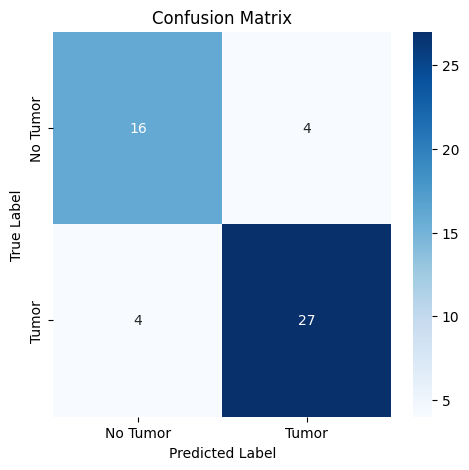

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["No Tumor", "Tumor"]))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Tumor", "Tumor"],
    yticklabels=["No Tumor", "Tumor"],
)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")


SAMPLE PREDICTIONS


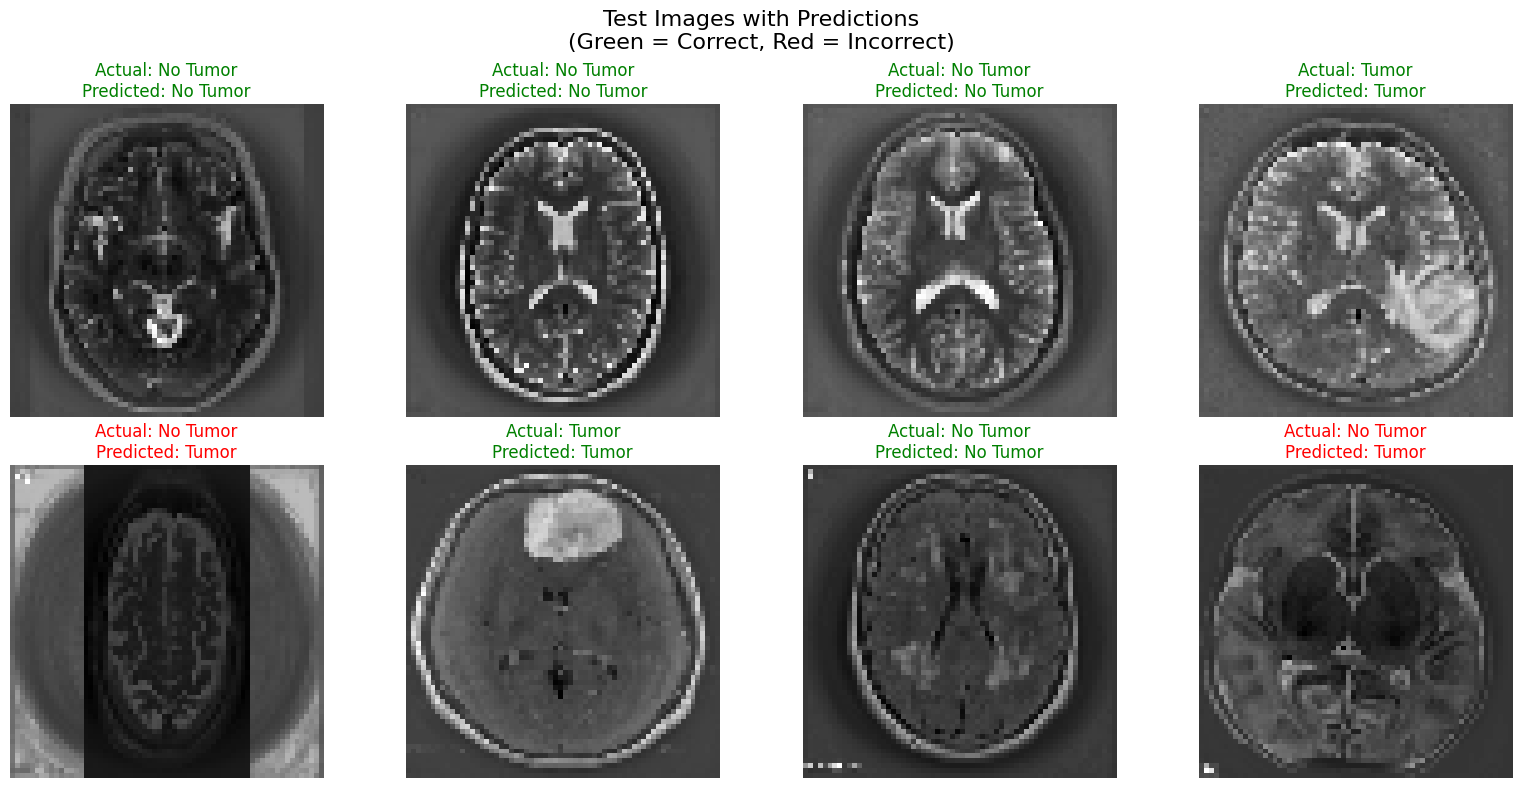

In [ ]:
# Display test images with predictions
def display_predictions(X_test, y_test, y_pred, num_samples=8):
    """Display test images with actual and predicted labels"""

    indices = np.random.choice(
        len(X_test), min(num_samples, len(X_test)), replace=False
    )

    plt.figure(figsize=(16, 8))

    for i, idx in enumerate(indices):
        plt.subplot(2, 4, i + 1)

        # Reshape flattened image back to 64x64
        img = X_test[idx].reshape(64, 64)
        plt.imshow(img, cmap="gray")

        actual = "Tumor" if y_test[idx] == 1 else "No Tumor"
        predicted = "Tumor" if y_pred[idx] == 1 else "No Tumor"

        # Color code: green for correct, red for incorrect
        color = "green" if y_test[idx] == y_pred[idx] else "red"

        plt.title(f"Actual: {actual}\nPredicted: {predicted}", color=color)
        plt.axis("off")

    plt.suptitle(
        "Test Images with Predictions\n(Green = Correct, Red = Incorrect)", fontsize=16
    )
    plt.tight_layout()
    plt.show()


print("\n" + "=" * 50)
print("SAMPLE PREDICTIONS")
print("=" * 50)
display_predictions(X_test_scaled, y_test, y_test_pred)